<a href="https://colab.research.google.com/github/sjhd1109/study/blob/main/credit_modeling_210306.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## credit modeling
- 로지스틱스
- 케라스

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive') # 새로운 창에서 key 를 받아서 입력해야합니다.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = '/content/drive/MyDrive/train_df.csv'
test = '/content/drive/MyDrive/test_df.csv'

In [ ]:
train_df = pd.read_csv(train, index_col=0)
test_df = pd.read_csv(test,index_col=0 )

train_df

,checking,history,purpose,savings,employed,installp,martial,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign,goodbad
0,2,5,3,1,4,4,3,1,3,3,1,3,1,1,3,1,2,1,1
1,1,3,1,1,2,4,2,1,3,3,1,3,1,1,3,1,2,1,0
2,4,5,4,1,3,1,2,1,1,3,1,3,2,2,3,1,2,1,0
3,4,3,1,1,3,3,4,1,2,1,1,3,2,2,3,1,2,1,0
4,1,3,1,2,4,4,3,1,3,3,1,3,2,1,4,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2,5,4,1,5,4,3,1,2,2,2,3,2,2,2,1,1,1,0
696,4,5,7,5,2,2,3,1,1,2,2,3,2,2,2,2,1,1,1
697,1,3,3,1,1,4,3,1,3,2,2,3,2,1,4,1,2,1,0
698,4,3,4,1,5,4,3,1,4,3,2,3,2,1,3,1,1,1,0


In [ ]:
x_train = train_df[['checking',	'history'	,'purpose',	'savings'	,'employed',	'coapp',	'resident',	'property'	, 'other',	'housing','foreign']]
y_train = train_df['goodbad']

x_test = test_df[['checking',	'history'	,'purpose',	'savings'	,'employed',	'coapp',	'resident',	'property'	, 'other',	'housing','foreign']]
y_test = test_df['goodbad']


x_train

,checking,history,purpose,savings,employed,coapp,resident,property,other,housing,foreign
0,2,5,3,1,4,1,3,3,3,1,1
1,1,3,1,1,2,1,3,3,3,1,1
2,4,5,4,1,3,1,1,3,3,2,1
3,4,3,1,1,3,1,2,1,3,2,1
4,1,3,1,2,4,1,3,3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,2,5,4,1,5,1,2,2,3,2,1
696,4,5,7,5,2,1,1,2,3,2,1
697,1,3,3,1,1,1,3,2,3,2,1
698,4,3,4,1,5,1,4,3,3,2,1


In [ ]:
model1 = sm.Logit(y_train, x_train)
results = model1.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.603448
         Iterations 5


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      689
Method:                           MLE   Df Model:                           10
Date:                Fri, 05 Mar 2021   Pseudo R-squ.:                0.006162
Time:                        13:08:54   Log-Likelihood:                -422.41
converged:                       True   LL-Null:                       -425.03
Covariance Type:            nonrobust   LLR p-value:                    0.8747
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
checking       0.0321      0.069      0.467      0.640      -0.103       0.167
history        0.0631      0.081      0.779      0.436      -0.096       0.222
purpose       -0.0463      0.033     -1.391      0.164      -0.112       0.019
savings        0.0458      0.055      0.836      0.403      -0.062       0.153
employed      -0.0506      0.073     -0.697      0.486      -0.193       0.092
coapp          0.0212      0.181      0.117      0.907      -0.334       0.377
resident      -0.1175      0.079     -1.496      0.135      -0.271       0.036
property      -0.0096      0.085     -0.113      0.910      -0.176       0.157
other         -0.1614      0.107     -1.505      0.132      -0.372       0.049
housing        0.1442      0.159      0.905      0.366      -0.168       0.457
foreign       -0.4260      0.378     -1.128      0.259      -1.166       0.314
==============================================================================
"""

In [ ]:
results.params

checking    0.032095
history     0.063095
purpose    -0.046329
savings     0.045820
employed   -0.050598
coapp       0.021175
resident   -0.117454
property   -0.009630
other      -0.161443
housing     0.144224
foreign    -0.426014
dtype: float64

In [ ]:
np.exp(results.params)

checking    1.032616
history     1.065128
purpose     0.954727
savings     1.046886
employed    0.950661
coapp       1.021401
resident    0.889182
property    0.990416
other       0.850915
housing     1.155143
foreign     0.653107
dtype: float64

In [ ]:
pred_y = results.predict(x_test)
pred_y

0      0.345806
1      0.254334
2      0.246892
3      0.307122
4      0.226162
         ...   
295    0.248634
296    0.340915
297    0.259884
298    0.371727
299    0.287660
Length: 300, dtype: float64

In [ ]:
# 임계값 함수

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_y1 = cut_off(pred_y, 0.5)
pred_y1

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Length: 300, dtype: int64

In [ ]:
# confusion matrix (분류 표를 나타낸 행렬)

cfmat = confusion_matrix(y_test, pred_y1)
print(cfmat)

[[207   0]
 [ 93   0]]


In [ ]:
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
	return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.69

In [ ]:
# 임계값 0~1에 따른 정확도 확인

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
	pred_Y = cut_off(y_pred,i)
	cfmat = confusion_matrix(y_test,pred_y1)
	table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.69
0.1,0.69
0.2,0.69
0.3,0.69
0.4,0.69
0.5,0.69
0.6,0.69
0.7,0.69
0.8,0.69


AUC: 0.4696119682094437


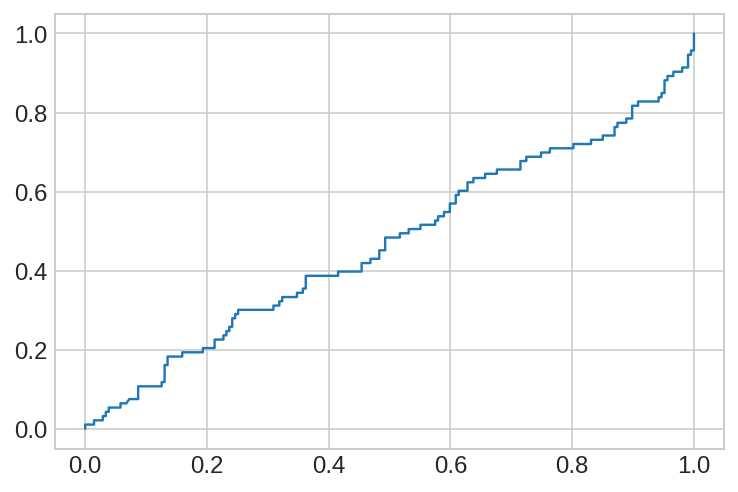

In [ ]:
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

##케라스

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from keras.layers import Dense, Dropout
from pandas.api.types import is_string_dtype
import tensorflow as tf

In [ ]:
#원핫인코딩_train_df
dataset = train_df.values
X = dataset[:,:18].astype('float')  #df 에서 goodbad 제외
y_obj = dataset[:,-1]   #target 

e=LabelEncoder()
e.fit(y_obj)
y=e.transform(y_obj)
y_encoded=tf.keras.utils.to_categorical(y)
y_encoded[:18]



#원핫인코딩_test_df
dataset1 = test_df.values
test_X = dataset1[:,:18].astype('float')  #df 에서 goodbad 제외
y_obj1 = dataset1[:,-1]   #target 

e1=LabelEncoder()
e1.fit(y_obj1)
y1=e1.transform(y_obj1)
test_Y=tf.keras.utils.to_categorical(y1)
y1_encoded[:18]

In [ ]:
train_X, val_X, train_Y, val_Y = train_test_split(X, y_encoded, test_size=0.8, random_state=0)

In [ ]:
model = Sequential()

# 옵티마이저는 경사하강법 sgd를 사용
sgd = optimizers.SGD(lr=0.03, decay=0, momentum=0.9, nesterov=False)
model.add(Dense(18, input_dim=train_X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy','mae', 'mse'])

In [ ]:
history=model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=100, batch_size=100)

Epoch 1/100
2/2 [==============================] - 0s 133ms/step - loss: 0.5920 - accuracy: 0.7000 - mae: 0.4047 - mse: 0.2022 - val_loss: 0.6206 - val_accuracy: 0.7018 - val_mae: 0.4154 - val_mse: 0.2136
Epoch 2/100
2/2 [==============================] - 0s 63ms/step - loss: 0.5919 - accuracy: 0.7000 - mae: 0.4046 - mse: 0.2022 - val_loss: 0.6206 - val_accuracy: 0.7018 - val_mae: 0.4152 - val_mse: 0.2136
Epoch 3/100
2/2 [==============================] - 0s 69ms/step - loss: 0.5918 - accuracy: 0.7000 - mae: 0.4043 - mse: 0.2021 - val_loss: 0.6206 - val_accuracy: 0.7018 - val_mae: 0.4153 - val_mse: 0.2136
Epoch 4/100
2/2 [==============================] - 0s 69ms/step - loss: 0.5917 - accuracy: 0.7000 - mae: 0.4045 - mse: 0.2021 - val_loss: 0.6206 - val_accuracy: 0.7018 - val_mae: 0.4151 - val_mse: 0.2135
Epoch 5/100
2/2 [==============================] - 0s 65ms/step - loss: 0.5918 - accuracy: 0.7000 - mae: 0.4040 - mse: 0.2022 - val_loss: 0.6204 - val_accuracy: 0.7018 - val_mae: 0.41

In [ ]:
print("정확도 결과는 : {} %".format(np.round(model.evaluate(train_X, train_Y)[1],3)))

5/5 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7071 - mae: 0.4038 - mse: 0.1979
정확도 결과는 : 0.707 %


In [ ]:
Y_PRED = model.predict(test_X)
score = model.evaluate(test_X, test_Y) 

10/10 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6933 - mae: 0.4136 - mse: 0.2255


In [ ]:
print("정확도 결과는 : {} %".format(np.round(model.evaluate(test_X, test_Y)[1],3)))
score = pd.DataFrame(score, index = model.metrics_names).T
history = pd.DataFrame(history.history)
display(score.style.hide_index())

10/10 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6933 - mae: 0.4136 - mse: 0.2255
정확도 결과는 : 0.693 %


loss,accuracy,mae,mse
0.658724,0.693333,0.413604,0.225524


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= history.index.values, y= history['loss'].values, line=dict(color='OrangeRed', width= 1.5), 
                         name = 'Loss'))
fig.add_trace(go.Scatter(x= history.index.values, y= history['accuracy'].values, line=dict(color='MidnightBlue', width= 1.5), 
                         name = 'Accuracy'))
fig.add_trace(go.Scatter(x= history.index.values, y= history['mae'].values, line=dict(color='ForestGreen', width= 1.5), 
                         name = 'Mean Absolute Error (MAE)'))
fig.add_trace(go.Scatter(x= history.index.values, y= history['mse'].values, line=dict(color='purple', width= 1.5), 
                         name = 'Mean Squared Error (MSE)'))
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=12))
fig.update_layout(dragmode='select', plot_bgcolor= 'white', height=600, hovermode='closest')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Lightgray')
fig.update_xaxes(showline=True, linewidth=1, linecolor='Lightgray', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='Lightgray', mirror=True)
fig['layout']['xaxis'].update(range=[0, history.index.values.max()])
fig['layout']['yaxis'].update(range=[0, 1.0])
fig.show()

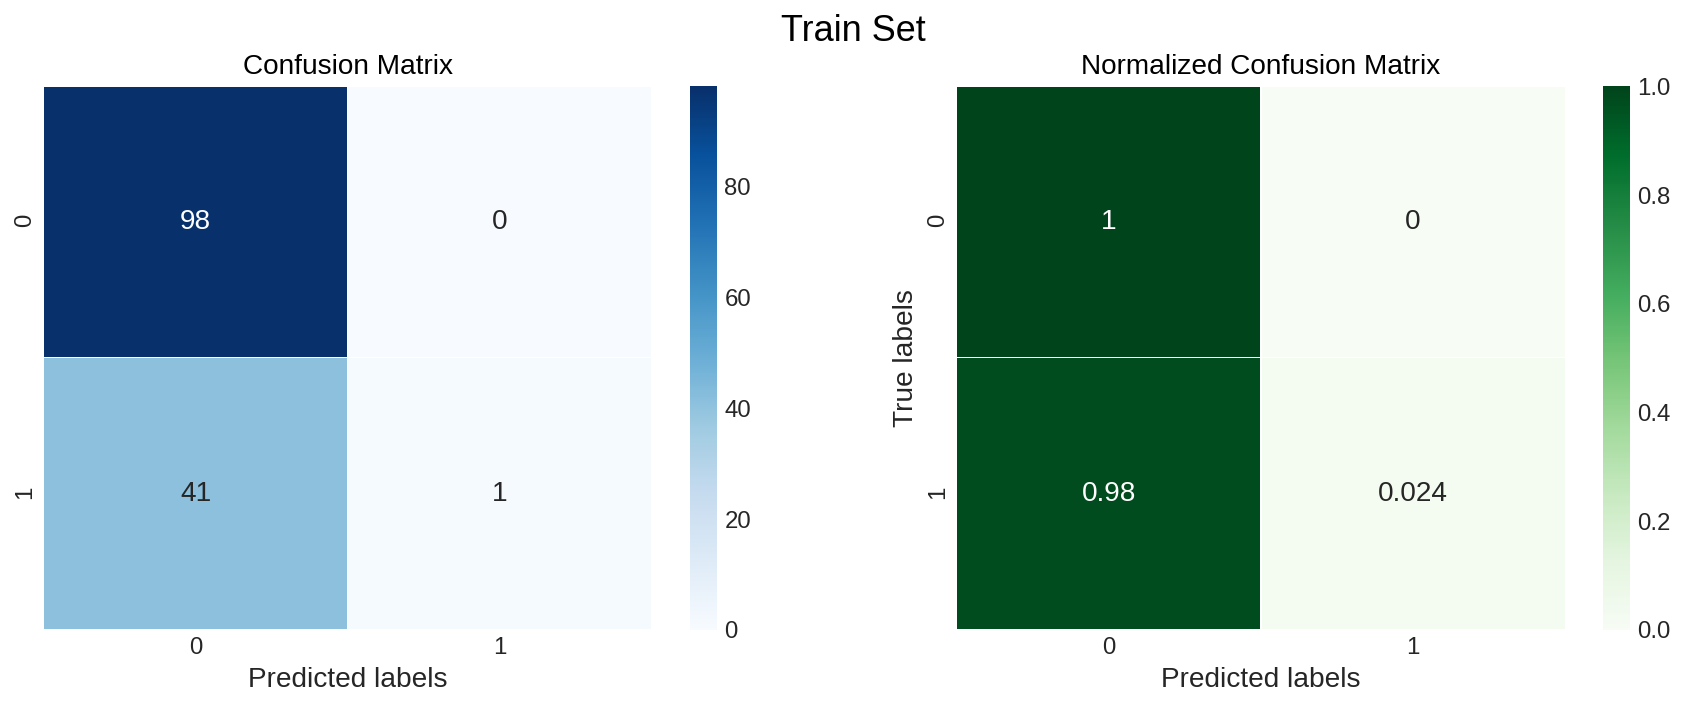

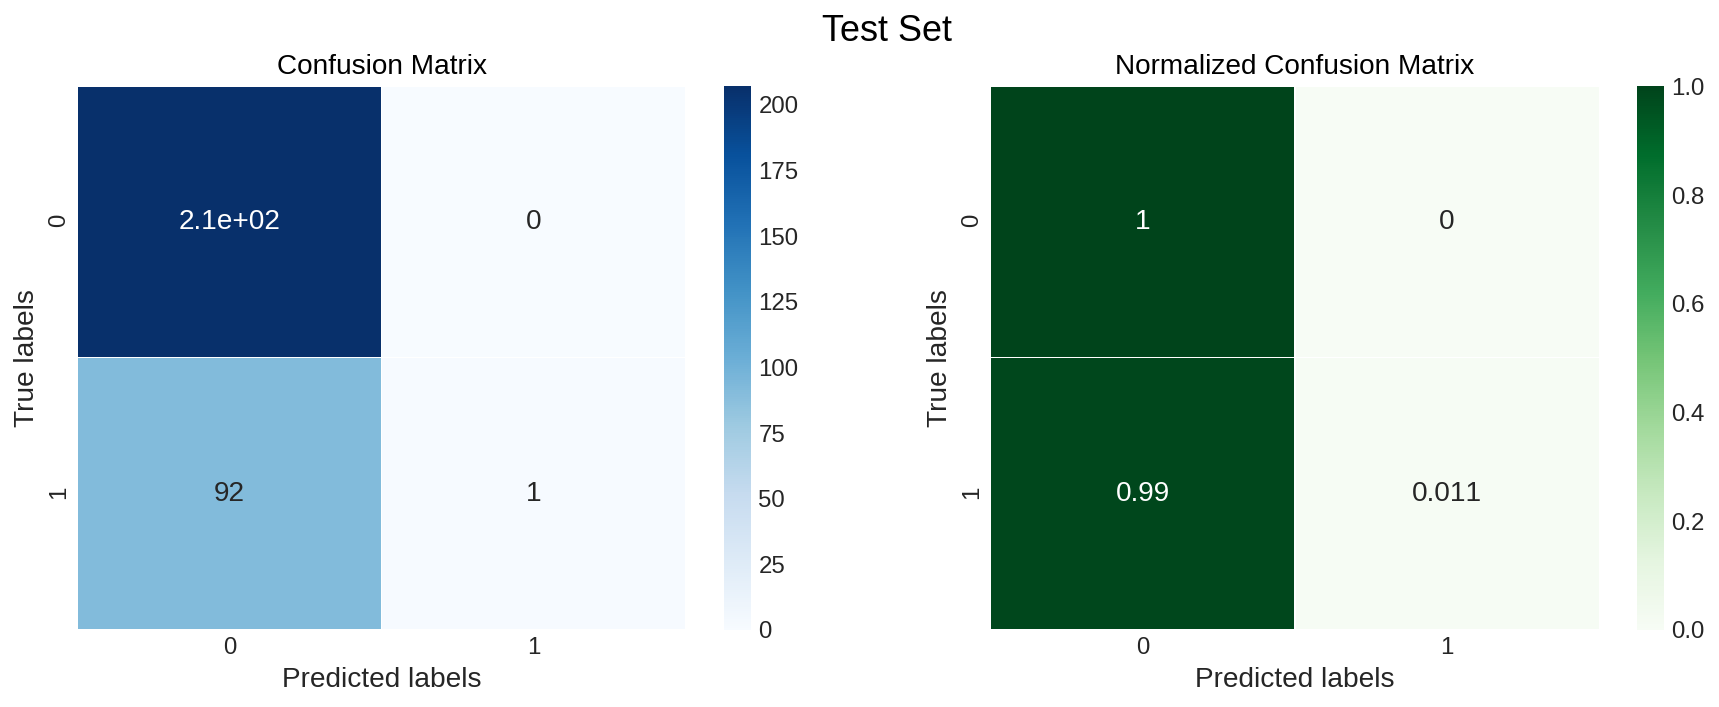

In [ ]:
# Train set
train_pred = model.predict(train_X)
Confusion_Matrix = confusion_matrix(train_Y.argmax(axis=1), train_pred.argmax(axis=1))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Train Set', fontsize = 18)
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Blues", ax = ax[0],
               linewidths = 0.2, cbar_kws={"shrink": 1})
_ = ax[0].set_xlabel('Predicted labels')
#_ = ax[0].set_ylabel('True labels'); 
_ = ax[0].set_title('Confusion Matrix');
#_ = ax[0].xaxis.set_ticklabels(Labels)
#_ = ax[0].yaxis.set_ticklabels(Labels)

Confusion_Matrix = Confusion_Matrix.astype('float') / Confusion_Matrix.sum(axis=1)[:, np.newaxis]
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Greens", ax = ax[1],
               linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": 1})
_ = ax[1].set_xlabel('Predicted labels')
_ = ax[1].set_ylabel('True labels'); 
_ = ax[1].set_title('Normalized Confusion Matrix');
#_ = ax[1].xaxis.set_ticklabels(Labels)
#_ = ax[1].yaxis.set_ticklabels(Labels)

# Test set
Confusion_Matrix = confusion_matrix(test_Y.argmax(axis=1), Y_PRED.argmax(axis=1))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Test Set', fontsize = 18)
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Blues", ax = ax[0],
                linewidths = 0.2, cbar_kws={"shrink": 1})
_ = ax[0].set_xlabel('Predicted labels')
_ = ax[0].set_ylabel('True labels'); 
_ = ax[0].set_title('Confusion Matrix');
#_ = ax[0].xaxis.set_ticklabels(Labels)
#_ = ax[0].yaxis.set_ticklabels(Labels)

Confusion_Matrix = Confusion_Matrix.astype('float') / Confusion_Matrix.sum(axis=1)[:, np.newaxis]
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Greens", ax = ax[1],
               linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": 1})
_ = ax[1].set_xlabel('Predicted labels')
_ = ax[1].set_ylabel('True labels'); 
_ = ax[1].set_title('Normalized Confusion Matrix');
#_ = ax[1].xaxis.set_ticklabels(Labels)
#_ = ax[1].yaxis.set_ticklabels(Labels)
